# Question 6

In [1]:
import math

In [2]:
def intapprox(a,b, func, locs, weights):
    """
    a : float, lower bound of integral
    b : float, upper bound of integral
    func: function, function being integrated
    locs: list of floats, showing location where approx sample is taken
    weights: list of floats, showing weights of each sample
    """
    n = len(locs)
    approx = 0
    for i in range(n):
        approx += weights[i]*func(locs[i])
    approx *= (b-a)
    return approx

In [3]:
func = lambda x: x**3 + x**2
a = 0
b = 10
trap_rule = intapprox(a,b,func, [a,b],[0.5,0.5])
simp_rule = intapprox(a,b,func, [a, (a+b)/2, b], [1/6,2/3, 1/6])
two_point_Gauss_quad = intapprox(a,b, func, [0.5*(a+b+(b-a)/math.sqrt(3)),0.5*(a+b-(b-a)/math.sqrt(3))], [0.5, 0.5] )
print(trap_rule, simp_rule, two_point_Gauss_quad)

5500.0 2833.333333333333 2833.333333333334


In [4]:
actual_ans = 10**4/4 + 10**3/3
print(trap_rule - actual_ans, simp_rule - actual_ans, two_point_Gauss_quad- actual_ans)

2666.6666666666665 -4.547473508864641e-13 4.547473508864641e-13


# Question 7

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

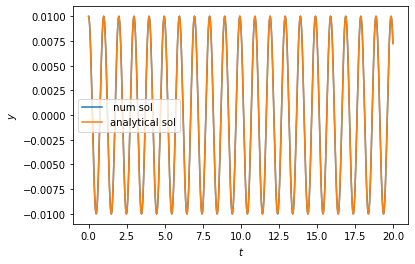

<Figure size 432x288 with 0 Axes>

In [11]:
dt=0.01
m=1
k=40
f=0

time = np.arange(0,20,dt)
x = np.zeros(len(time))
x[0] = 0.01
x[1] = 0.01

for n in range (2, len(time)):
    x[n] = (dt**2/m)*(f - k*x[n-1]) + 2*x[n-1] - x[n-2]

x_ans = 0.01*np.cos(np.sqrt(k/m)*time)

plt.plot(time, x, label=" num sol")
plt.plot(time, x_ans, label = "analytical sol")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

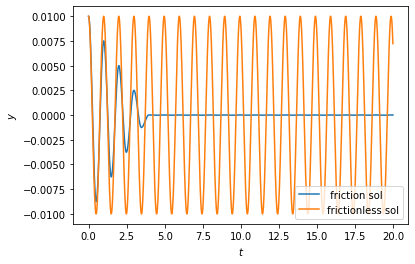

<Figure size 432x288 with 0 Axes>

In [12]:
def f(V):
    if V < 0:
        return 0.025
    elif V > 0:
        return -0.025
    else:
        return 0

for n in range (2, len(time)):
    V = (x[n-1] - x[n-2])/dt
    x[n] = (dt**2/m)*(f(V) - k*x[n-1]) + 2*x[n-1] - x[n-2]


plt.plot(time, x, label=" friction sol")
plt.plot(time, x_ans, label = "frictionless sol")
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.legend()
plt.figure()

# Exercise 8

In [21]:
import random

In [30]:
def rect_doubleintegrate(f,a,b,n):
    ans = 0
    for _ in range(int(n)):
        x = random.uniform(-a,a)
        y = random.uniform(-b,b)
    
        ans += f(x,y)
    return 4*a*b*ans/n

In [31]:
f = lambda x,y : np.exp(x*y)*(np.cos(y)**2*np.sin(x**2))

in1 = rect_doubleintegrate(f,1,1,100)
print(in1)

in2 = rect_doubleintegrate(f,1,1,1e4)
print(in2)

in3 = rect_doubleintegrate(f,1,1,1e6)
print(in3)

1.1080843825601479
0.9526402749198616
0.967715080257893


In [33]:
circfunc = lambda x,y: 1 if x**2 + y**2 < 1.0 else 0

in1 = rect_doubleintegrate(circfunc,1,1,100)
print(in1)

in2 = rect_doubleintegrate(circfunc,1,1,1e4)
print(in2)

in3 = rect_doubleintegrate(circfunc,1,1,1e6)
print(in3)

3.16
3.1488
3.141624
